### 特征量

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
faces.data.shape # 13233个样本，每个样本有2914个特征

(13233, 2914)

In [6]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [7]:
faces.images.shape # 13233个样本，每个样本是62 * 47的图像

(13233, 62, 47)

In [8]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes] 
example_faces = X[:36, :] #随机取36个样本
example_faces.shape

(36, 2914)

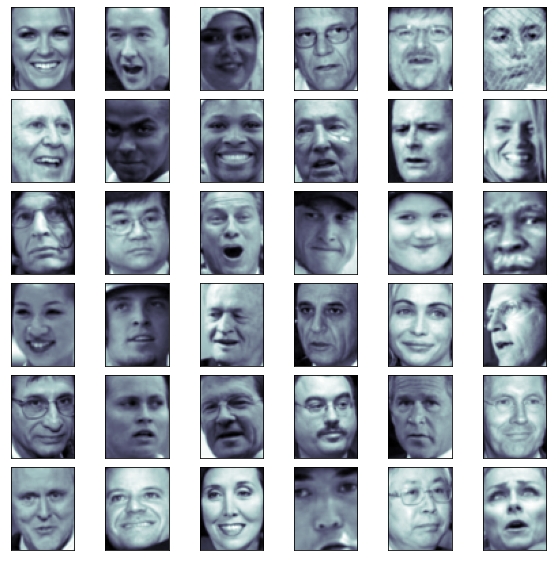

In [9]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

### 特征脸

In [10]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 11.9 s


PCA(svd_solver='randomized')

In [12]:
pca.components_.shape  # 2914个主成分，每个主成分有2914维
# 可以将每个主成分理解成一个特征脸。按照重要程度进行排序

(2914, 2914)

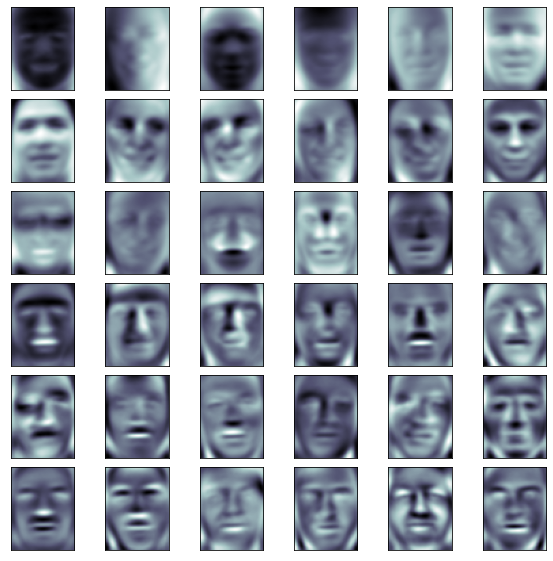

In [13]:
plot_faces(pca.components_[:36, :]) # 每个特征脸按照重要程度排序。可以发现最重要的脸部轮廓

### 更多关于lfw_people数据集

In [14]:
# 选取在数据集中至少有60张图片的人物
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [15]:
faces2.data.shape

(1348, 2914)

In [16]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [17]:
len(faces2.target_names)

8